# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid', palette= 'rainbow')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

# Importing Dataset
# Air Line

In [2]:
df = pd.read_excel(r"C:\Users\ahmed\Downloads\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

<Axes: >

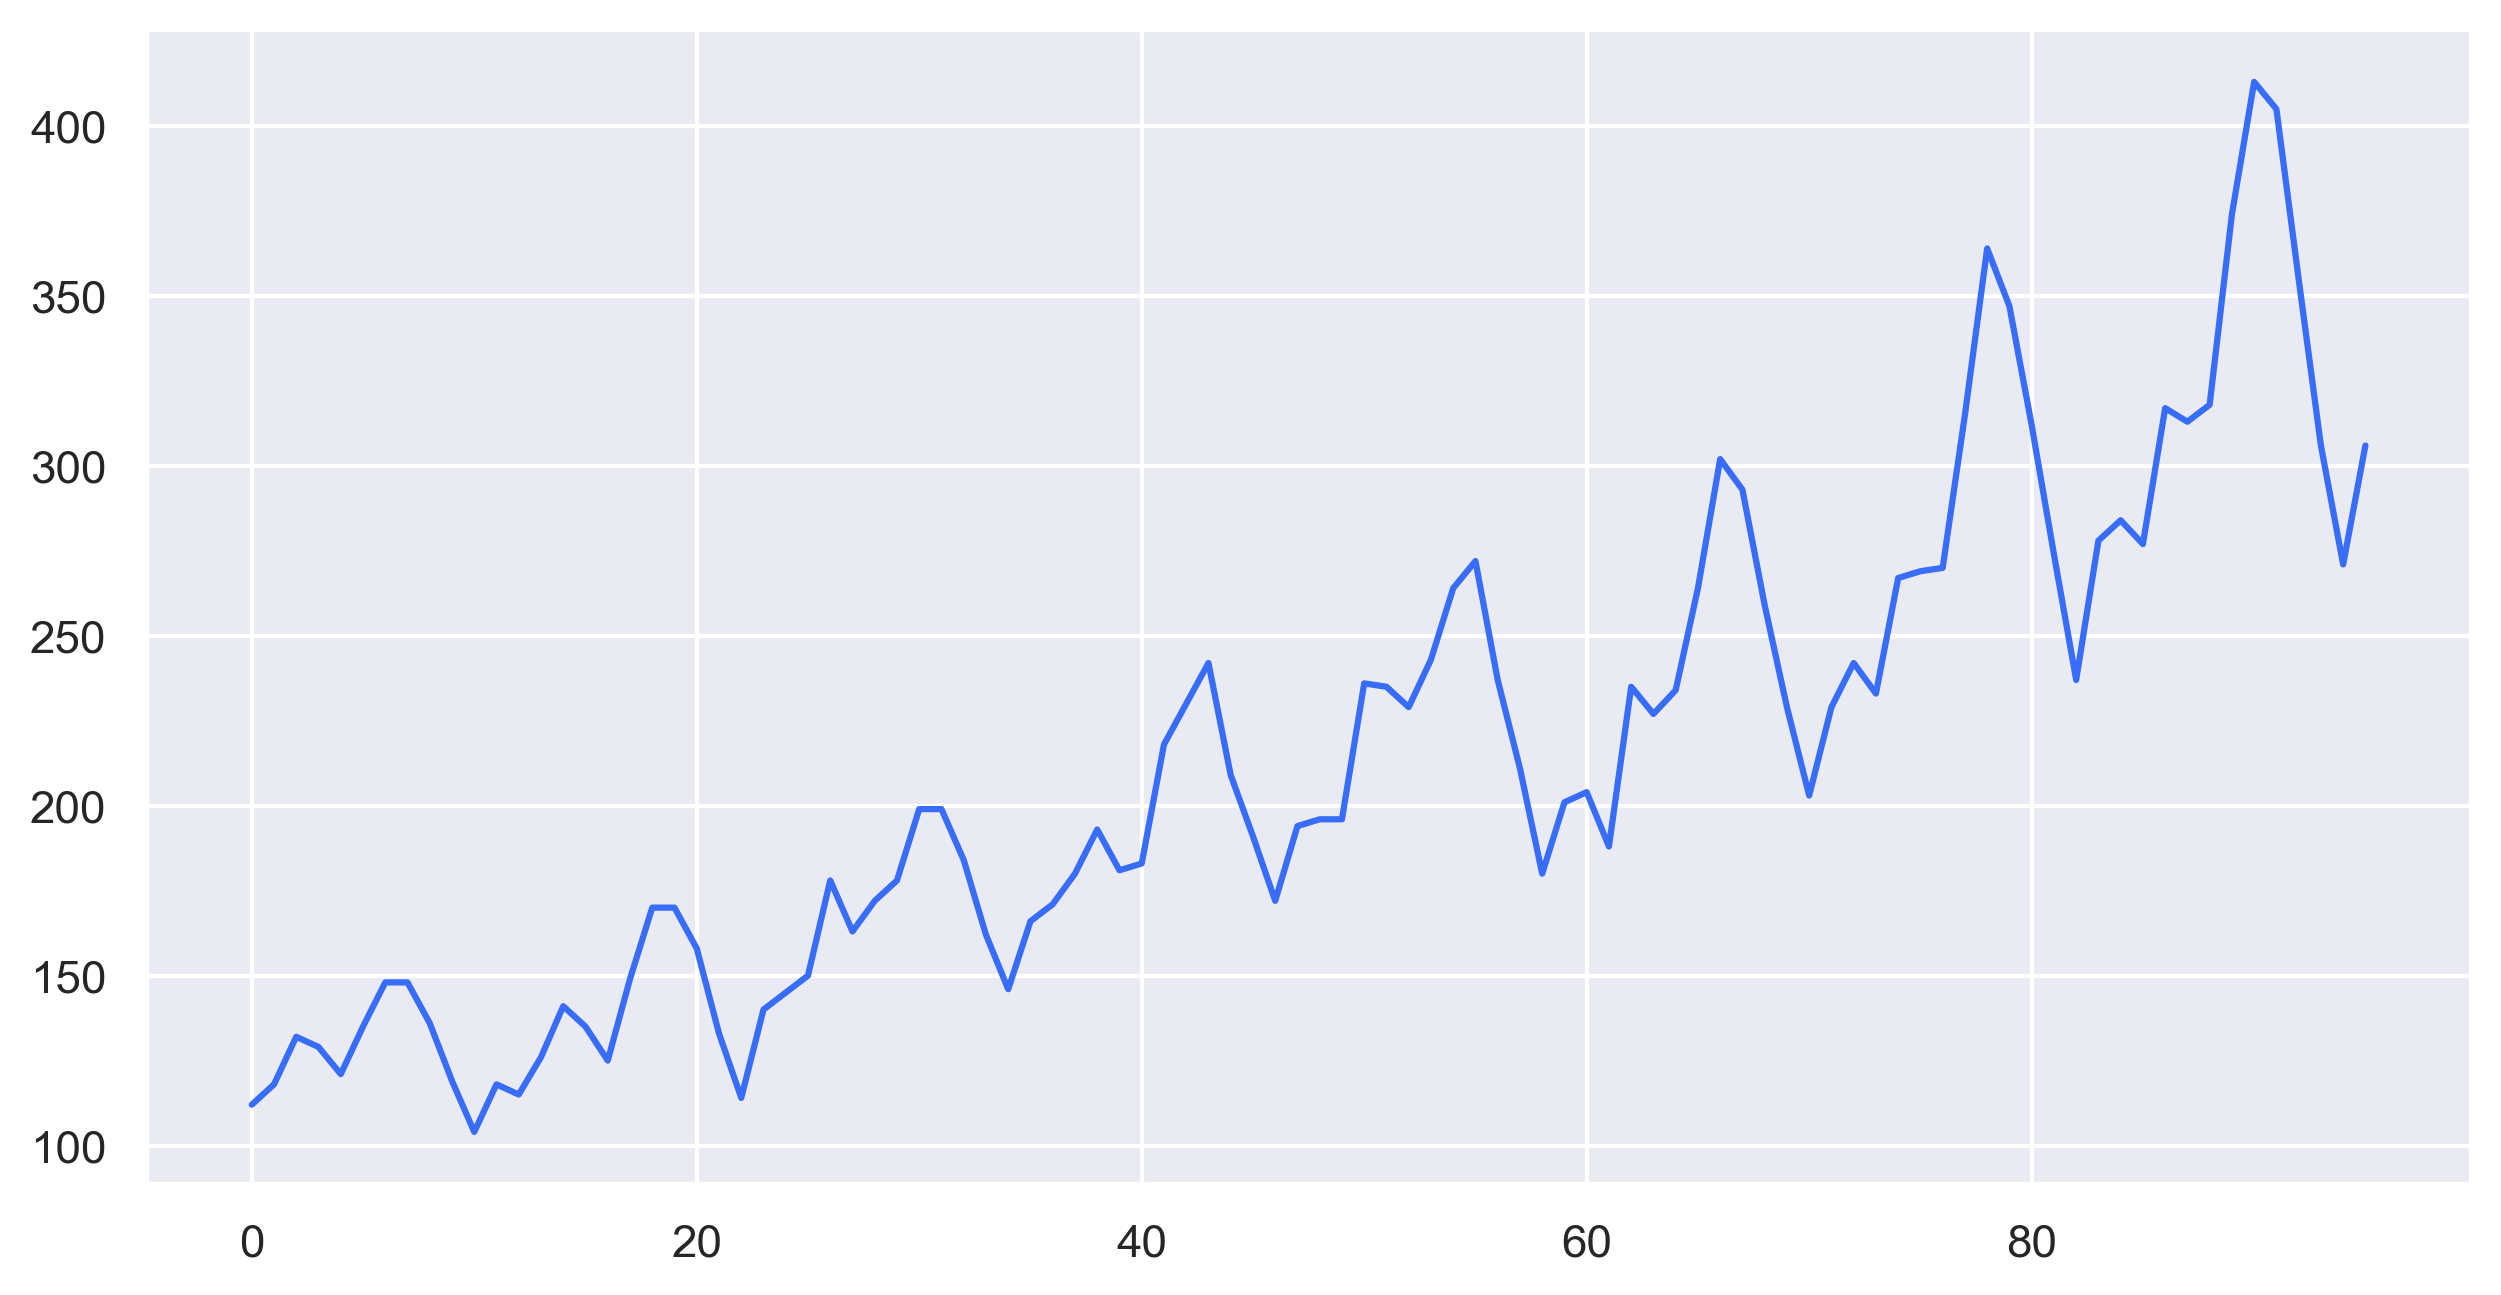

In [3]:
df.Passengers.plot()

In [4]:
# The datatset has a trend and Multiplicative Seasonality

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.insert(2,'t', range(1,len(df)+1))
df

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
91,2002-08-01,405,92
92,2002-09-01,355,93
93,2002-10-01,306,94
94,2002-11-01,271,95


In [7]:
df['Month_Name'] = df['Month'].dt.strftime('%b')
df

,Month,Passengers,t,Month_Name
0,1995-01-01,112,1,Jan
1,1995-02-01,118,2,Feb
2,1995-03-01,132,3,Mar
3,1995-04-01,129,4,Apr
4,1995-05-01,121,5,May
...,...,...,...,...
91,2002-08-01,405,92,Aug
92,2002-09-01,355,93,Sep
93,2002-10-01,306,94,Oct
94,2002-11-01,271,95,Nov


# Column Transformation

In [8]:
df['log_passengers'] = np.log(df['Passengers'])
df

,Month,Passengers,t,Month_Name,log_passengers
0,1995-01-01,112,1,Jan,4.718499
1,1995-02-01,118,2,Feb,4.770685
2,1995-03-01,132,3,Mar,4.882802
3,1995-04-01,129,4,Apr,4.859812
4,1995-05-01,121,5,May,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,Aug,6.003887
92,2002-09-01,355,93,Sep,5.872118
93,2002-10-01,306,94,Oct,5.723585
94,2002-11-01,271,95,Nov,5.602119


In [9]:
df['t2'] = np.square(df['t'])
df

,Month,Passengers,t,Month_Name,log_passengers,t2
0,1995-01-01,112,1,Jan,4.718499,1
1,1995-02-01,118,2,Feb,4.770685,4
2,1995-03-01,132,3,Mar,4.882802,9
3,1995-04-01,129,4,Apr,4.859812,16
4,1995-05-01,121,5,May,4.795791,25
...,...,...,...,...,...,...
91,2002-08-01,405,92,Aug,6.003887,8464
92,2002-09-01,355,93,Sep,5.872118,8649
93,2002-10-01,306,94,Oct,5.723585,8836
94,2002-11-01,271,95,Nov,5.602119,9025


In [10]:
pd.set_option('display.max_columns', None)

# One-Hot Encoding

In [11]:
df = pd.get_dummies(data = df, columns=['Month_Name'])

# Extracting Year from Date Column

In [12]:
df['Year'] = df['Month'].dt.strftime('%Y')
df.head()

,Month,Passengers,t,log_passengers,t2,Month_Name_Apr,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,Month_Name_May,Month_Name_Nov,Month_Name_Oct,Month_Name_Sep,Year
0,1995-01-01,112,1,4.718499,1,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,2,4.770685,4,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,3,4.882802,9,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,4,4.859812,16,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,5,4.795791,25,0,0,0,0,0,0,0,0,1,0,0,0,1995


# Plotting Yearwise Passengers Data

<Axes: xlabel='Year', ylabel='Passengers'>

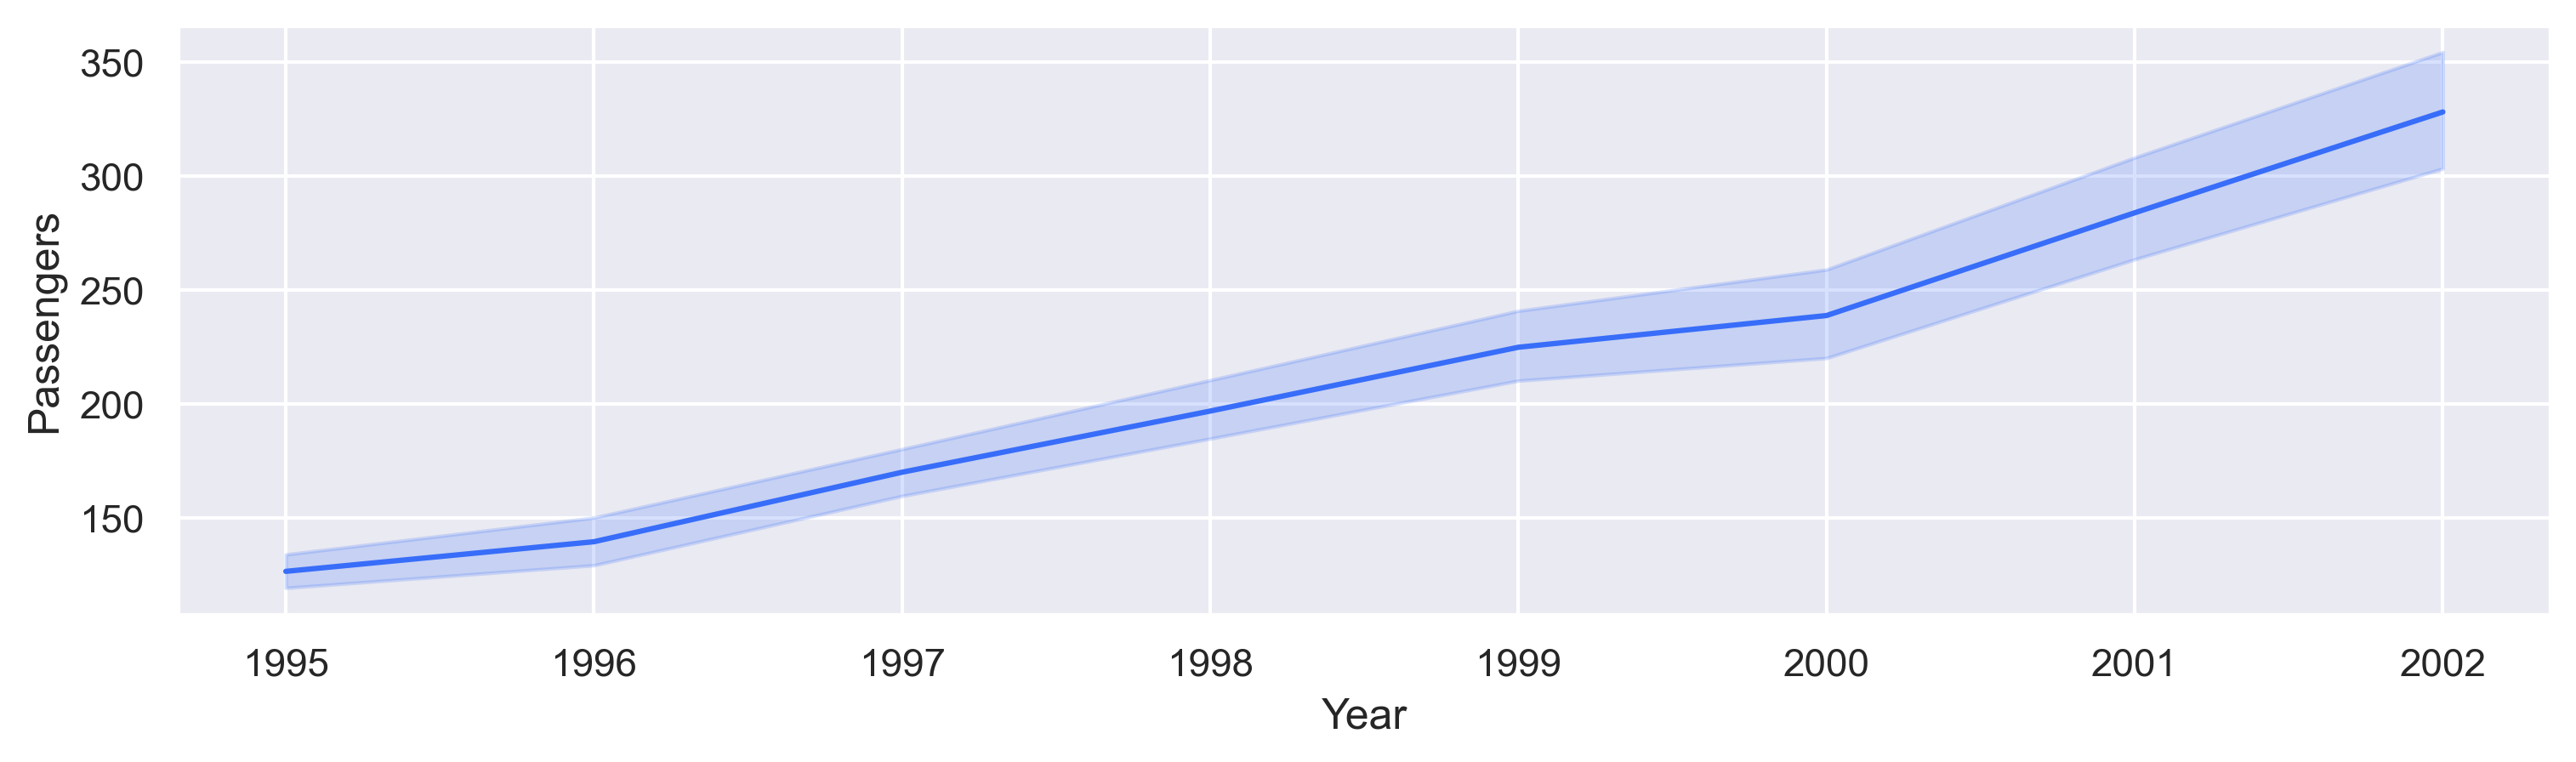

In [13]:
plt.figure(figsize = (12,3))
sns.lineplot(x = 'Year', y = 'Passengers', data = df)

# Model Building

# Splitting the Data

In [14]:
df.shape

(96, 18)

In [15]:
train = df.head(90)
test = df.tail(6)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))
rmse_linear

64.13398871447579

In [18]:
#Exponential Model
exp_model = smf.ols('log_passengers~t', data = train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'], pred_exp))
rmse_exp

340.9939395587

In [19]:
#Quadratic Model
quad_model = smf.ols('Passengers~t+t2', data = train).fit()
pred_quad = pd.Series(quad_model.predict(pd.DataFrame(test[['t','t2']])))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_quad))
rmse_quad

59.736114015621894

In [20]:
# Additive Seasonality
add_sea = smf.ols('Passengers~Month_Name_Jan+Month_Name_Feb+Month_Name_Mar+Month_Name_Apr+Month_Name_May+Month_Name_Jun+Month_Name_Jul+Month_Name_Aug+Month_Name_Sep+Month_Name_Oct+Month_Name_Nov', data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Month_Name_Jan','Month_Name_Feb','Month_Name_Mar','Month_Name_Apr','Month_Name_May','Month_Name_Jun','Month_Name_Jul','Month_Name_Aug','Month_Name_Sep','Month_Name_Oct','Month_Name_Nov']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea))
rmse_add_sea

139.2528410535907

In [21]:
# Additive Seasonality Quadratic
add_sea_quad = smf.ols('Passengers~t+t2+Month_Name_Jan+Month_Name_Feb+Month_Name_Mar+Month_Name_Apr+Month_Name_May+Month_Name_Jun+Month_Name_Jul+Month_Name_Aug+Month_Name_Sep+Month_Name_Oct+Month_Name_Nov', data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t2','Month_Name_Jan','Month_Name_Feb','Month_Name_Mar','Month_Name_Apr','Month_Name_May','Month_Name_Jun','Month_Name_Jul','Month_Name_Aug','Month_Name_Sep','Month_Name_Oct','Month_Name_Nov']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

29.678976914606864

In [22]:
#Multiplicative Seasonality
mul_add_sea = smf.ols('log_passengers~Month_Name_Jan+Month_Name_Feb+Month_Name_Mar+Month_Name_Apr+Month_Name_May+Month_Name_Jun+Month_Name_Jul+Month_Name_Aug+Month_Name_Sep+Month_Name_Oct+Month_Name_Nov',data = train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test[['Month_Name_Jan','Month_Name_Feb','Month_Name_Mar','Month_Name_Apr','Month_Name_May','Month_Name_Jun','Month_Name_Jul','Month_Name_Aug','Month_Name_Sep','Month_Name_Oct','Month_Name_Nov']]))
rmse_mul_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_mul_add_sea))
rmse_mul_add_sea

341.4931163370557

In [23]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,29.678977
2,rmse_quad,59.736114
0,rmse_linear,64.133989
3,rmse_add_sea,139.252841
1,rmse_exp,340.993940
5,rmse_mul_sea,341.493116


# Importing Dataset
# Coca-Cola

In [24]:
df = pd.read_excel(r"C:\Users\ahmed\Downloads\CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [26]:
df['Year'] = df['Quarter'].str.extract(r'(\d+)$')
df['Year'] = '19' + df['Year']
df

,Quarter,Sales,Year
0,Q1_86,1734.827000,1986
1,Q2_86,2244.960999,1986
2,Q3_86,2533.804993,1986
3,Q4_86,2154.962997,1986
4,Q1_87,1547.818996,1987
5,Q2_87,2104.411995,1987
6,Q3_87,2014.362999,1987
7,Q4_87,1991.746998,1987
8,Q1_88,1869.049999,1988
9,Q2_88,2313.631996,1988


# Plotting Yearwise Sales Data

<Axes: xlabel='Year', ylabel='Sales'>

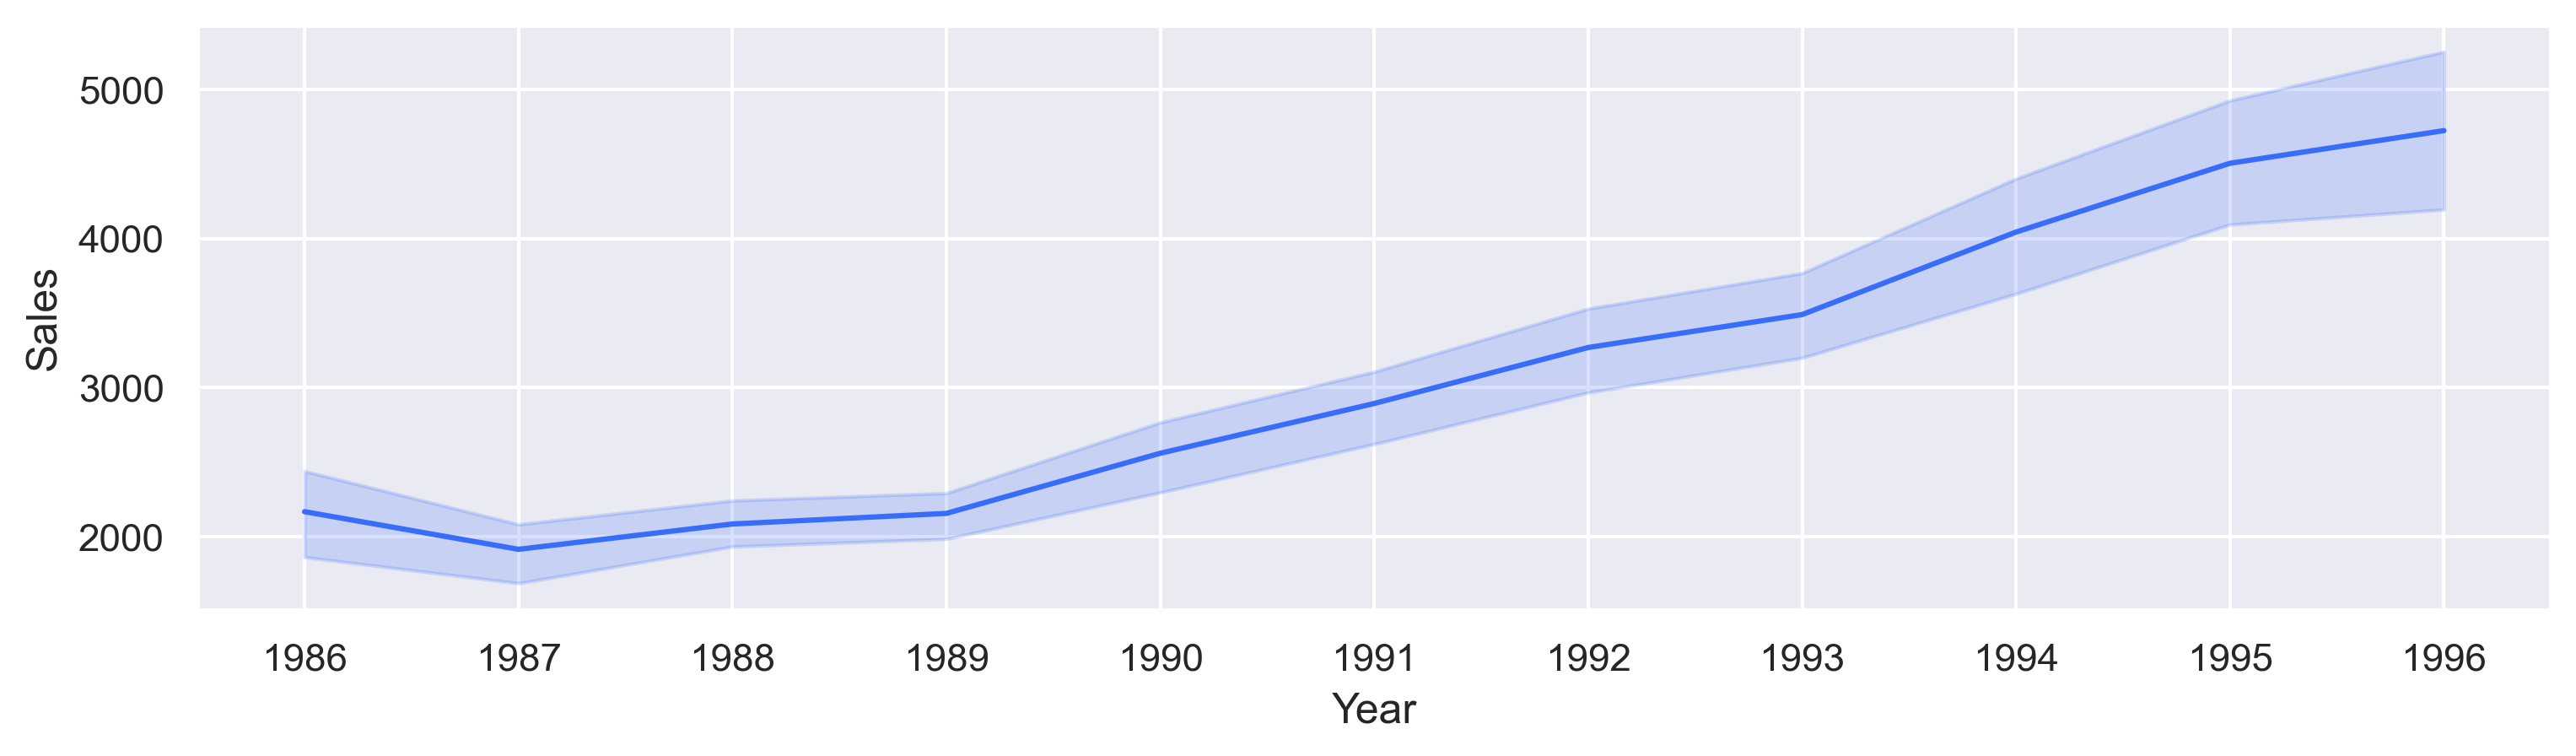

In [27]:
plt.figure(figsize = (12,3))
sns.lineplot(x = 'Year', y = 'Sales', data = df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   Year     42 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [29]:
df['Date'] = pd.to_datetime(df['Year'], format= '%Y')

In [30]:
df

,Quarter,Sales,Year,Date
0,Q1_86,1734.827000,1986,1986-01-01
1,Q2_86,2244.960999,1986,1986-01-01
2,Q3_86,2533.804993,1986,1986-01-01
3,Q4_86,2154.962997,1986,1986-01-01
4,Q1_87,1547.818996,1987,1987-01-01
5,Q2_87,2104.411995,1987,1987-01-01
6,Q3_87,2014.362999,1987,1987-01-01
7,Q4_87,1991.746998,1987,1987-01-01
8,Q1_88,1869.049999,1988,1988-01-01
9,Q2_88,2313.631996,1988,1988-01-01


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     object        
 1   Sales    42 non-null     float64       
 2   Year     42 non-null     object        
 3   Date     42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [32]:
data = pd.DataFrame(df['Date'])
data

,Date
0,1986-01-01
1,1986-01-01
2,1986-01-01
3,1986-01-01
4,1987-01-01
5,1987-01-01
6,1987-01-01
7,1987-01-01
8,1988-01-01
9,1988-01-01


In [33]:
data['Sale'] = df['Sales']
data

,Date,Sale
0,1986-01-01,1734.827000
1,1986-01-01,2244.960999
2,1986-01-01,2533.804993
3,1986-01-01,2154.962997
4,1987-01-01,1547.818996
5,1987-01-01,2104.411995
6,1987-01-01,2014.362999
7,1987-01-01,1991.746998
8,1988-01-01,1869.049999
9,1988-01-01,2313.631996


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    42 non-null     datetime64[ns]
 1   Sale    42 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 804.0 bytes


In [35]:
data.set_index('Date', inplace=True)
data

,Sale
Date,
1986-01-01,1734.827000
1986-01-01,2244.960999
1986-01-01,2533.804993
1986-01-01,2154.962997
1987-01-01,1547.818996
1987-01-01,2104.411995
1987-01-01,2014.362999
1987-01-01,1991.746998
1988-01-01,1869.049999


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-01-01 to 1996-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sale    42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [37]:
data.shape

(42, 1)

# Upsampling

In [38]:
upsampled = data.resample('M').mean()
upsampled

,Sale
Date,
1986-01-31,2167.138997
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,NaN
1986-05-31,NaN
...,...
1995-09-30,NaN
1995-10-31,NaN
1995-11-30,NaN


# Interpolate the Missing Values

In [39]:
interpolated = upsampled.interpolate()
interpolated

,Sale
Date,
1986-01-31,2167.138997
1986-02-28,2146.092851
1986-03-31,2125.046705
1986-04-30,2104.000560
1986-05-31,2082.954414
...,...
1995-09-30,4650.500000
1995-10-31,4668.750000
1995-11-30,4687.000000


<Axes: xlabel='Date'>

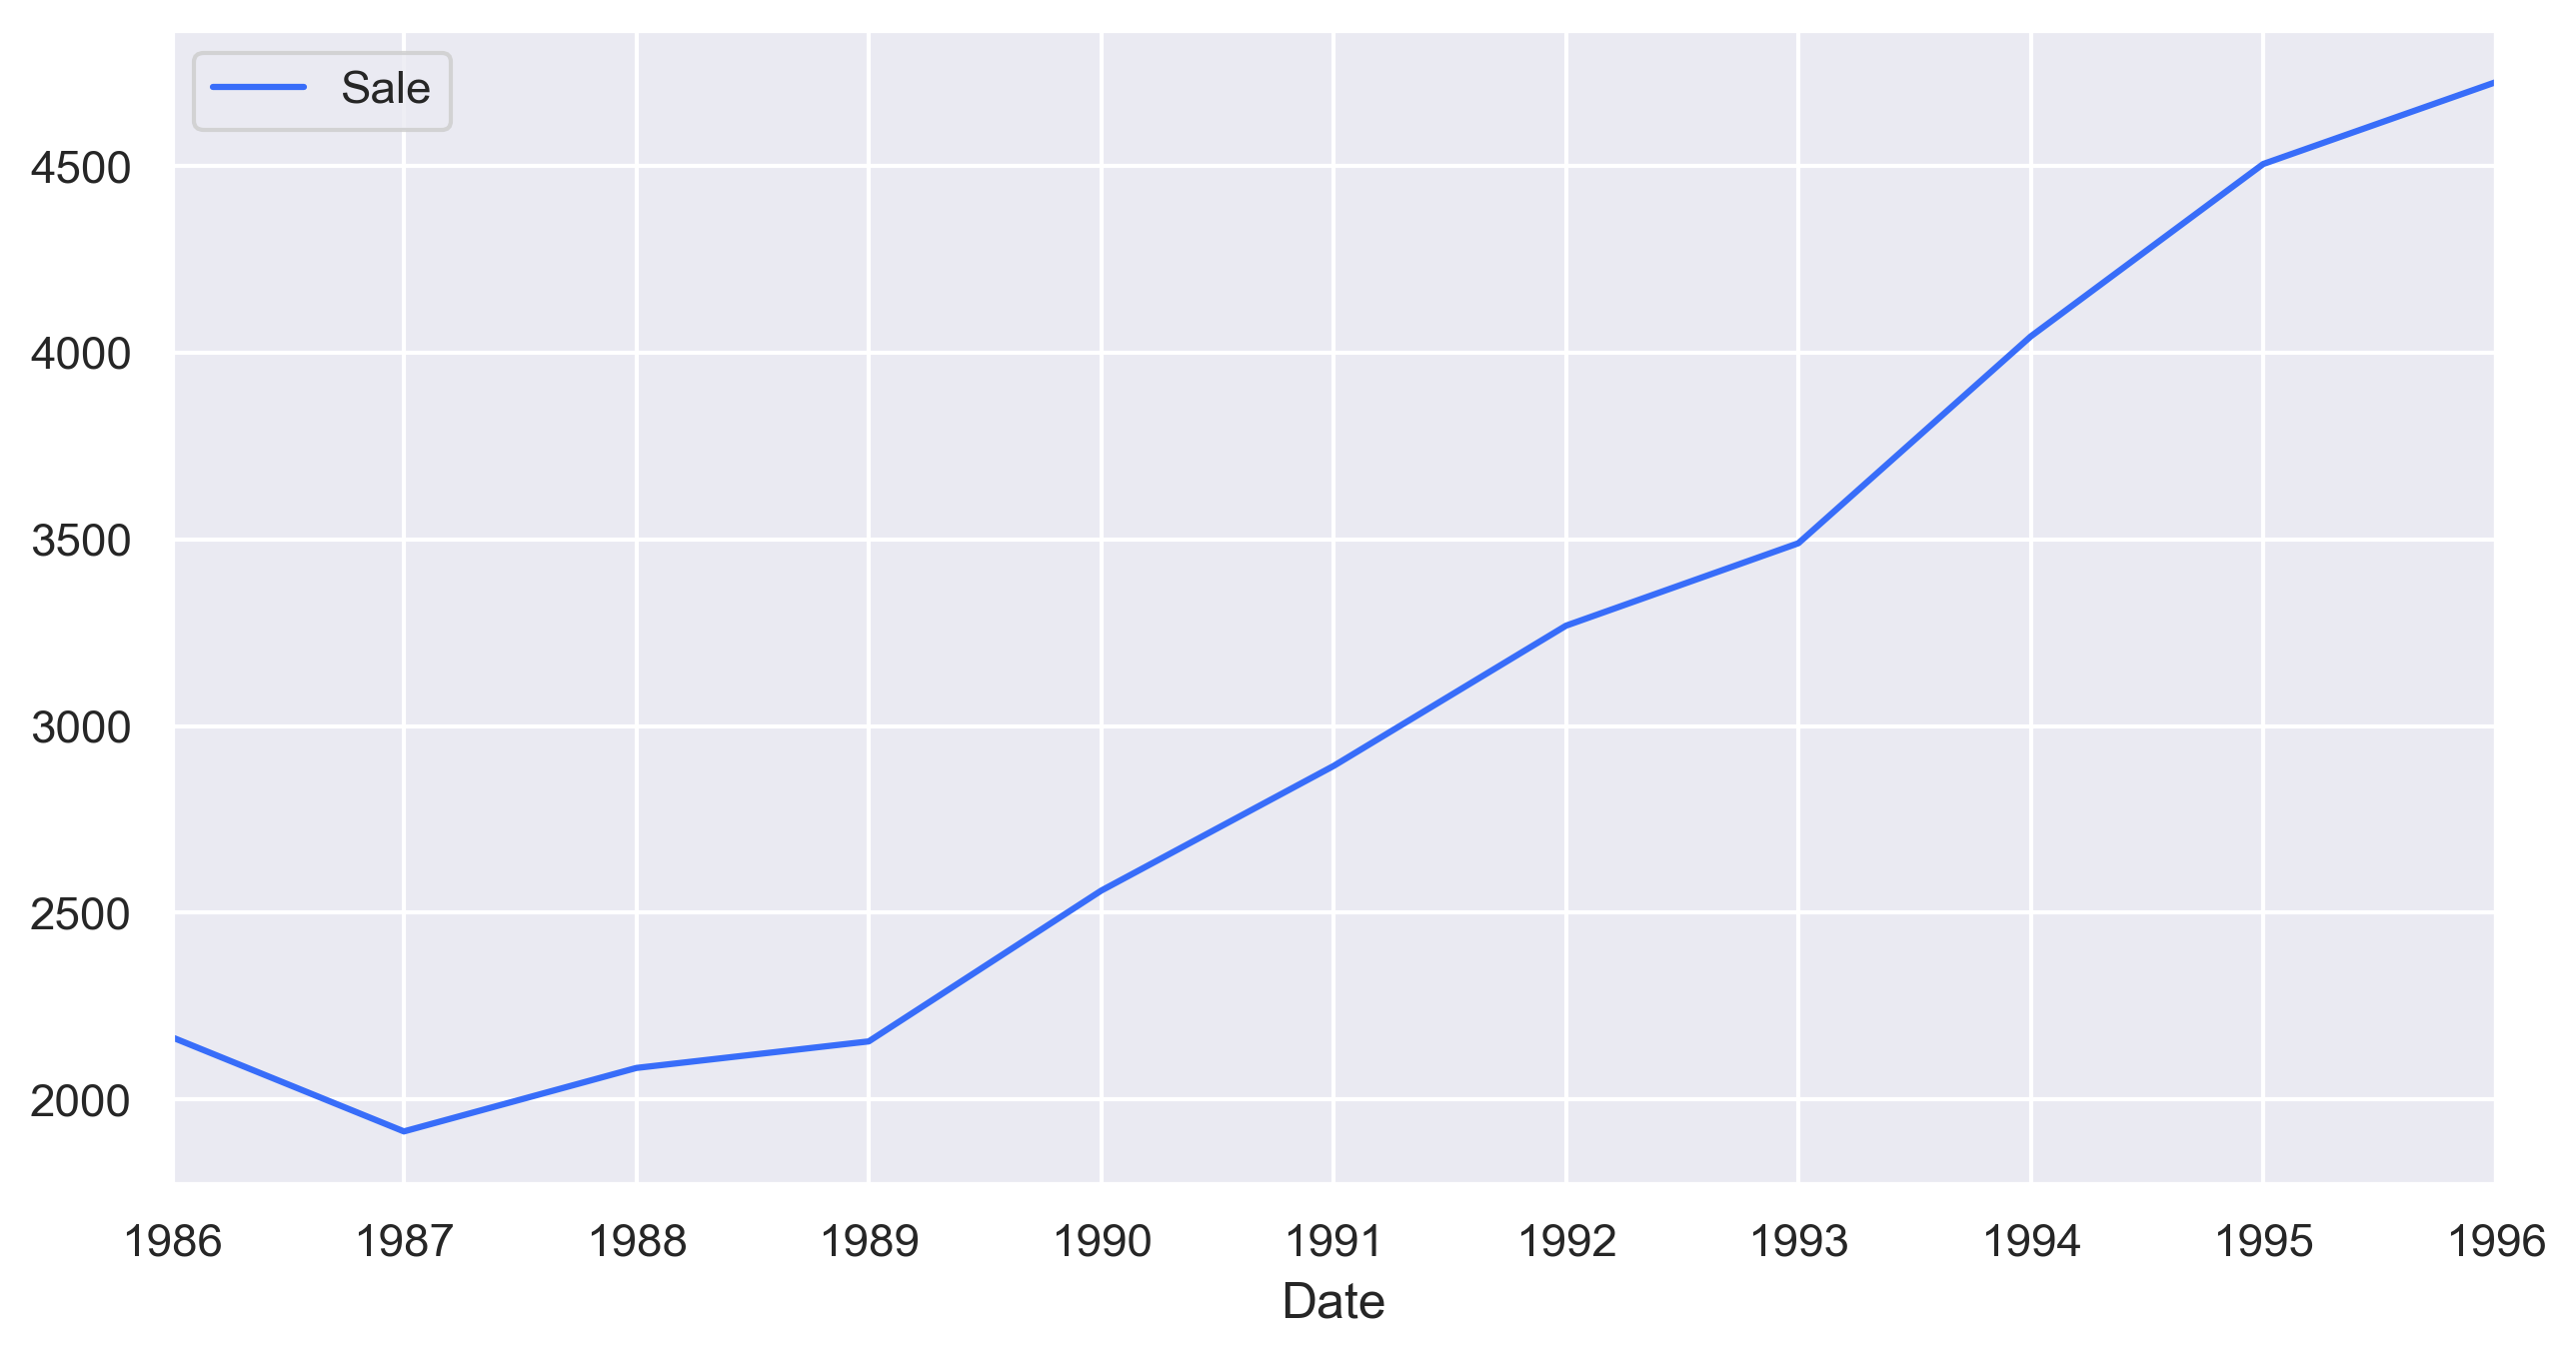

In [40]:
interpolated.plot()

# Reindexing

In [41]:
interpolated.reset_index(inplace=True)
interpolated

,Date,Sale
0,1986-01-31,2167.138997
1,1986-02-28,2146.092851
2,1986-03-31,2125.046705
3,1986-04-30,2104.000560
4,1986-05-31,2082.954414
...,...,...
116,1995-09-30,4650.500000
117,1995-10-31,4668.750000
118,1995-11-30,4687.000000
119,1995-12-31,4705.250000


# Adding Necessary Columns for Model Building

In [42]:
interpolated.insert(2,'t', range(1,len(interpolated)+1))
interpolated['month'] = interpolated['Date'].dt.strftime('%b')
interpolated['log_sale'] = np.log(interpolated['Sale'])
interpolated['t2'] = np.square(interpolated['t'])
interpolated = pd.get_dummies(data = interpolated, columns=['month'],prefix = None)
cc= interpolated
cc

,Date,Sale,t,log_sale,t2,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1986-01-31,2167.138997,1,7.681163,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1986-02-28,2146.092851,2,7.671404,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1986-03-31,2125.046705,3,7.661549,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1986-04-30,2104.000560,4,7.651596,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1986-05-31,2082.954414,5,7.641543,25,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1995-09-30,4650.500000,117,8.444730,13689,0,0,0,0,0,0,0,0,0,0,0,1
117,1995-10-31,4668.750000,118,8.448647,13924,0,0,0,0,0,0,0,0,0,0,1,0
118,1995-11-30,4687.000000,119,8.452548,14161,0,0,0,0,0,0,0,0,0,1,0,0
119,1995-12-31,4705.250000,120,8.456434,14400,0,0,1,0,0,0,0,0,0,0,0,0


In [44]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       121 non-null    datetime64[ns]
 1   Sale       121 non-null    float64       
 2   t          121 non-null    int64         
 3   log_sale   121 non-null    float64       
 4   t2         121 non-null    int64         
 5   month_Apr  121 non-null    uint8         
 6   month_Aug  121 non-null    uint8         
 7   month_Dec  121 non-null    uint8         
 8   month_Feb  121 non-null    uint8         
 9   month_Jan  121 non-null    uint8         
 10  month_Jul  121 non-null    uint8         
 11  month_Jun  121 non-null    uint8         
 12  month_Mar  121 non-null    uint8         
 13  month_May  121 non-null    uint8         
 14  month_Nov  121 non-null    uint8         
 15  month_Oct  121 non-null    uint8         
 16  month_Sep  121 non-null    uint8         
dt

In [45]:
cc.shape

(121, 17)

# Model Building
# Splitting the Data

In [46]:
train = cc.head(109)
test = cc.tail(12)

In [47]:
#Linear Model

linear_model = smf.ols('Sale~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sale'], pred_linear))
rmse_linear

297.17433619950407

In [48]:
#Exponential Model
exp_model = smf.ols('log_sale~t', data = train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Sale'], pred_exp))
rmse_exp

4615.125919711127

In [49]:
#Quadratic Model
quad_model = smf.ols('Sale~t+t2', data = train).fit()
pred_quad = pd.Series(quad_model.predict(pd.DataFrame(test[['t','t2']])))
rmse_quad = np.sqrt(mean_squared_error(test['Sale'], pred_quad))
rmse_quad

266.88952010404233

In [50]:
# Additive Seasonality
add_sea = smf.ols('Sale~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov', data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Sale'], pred_add_sea))
rmse_add_sea

1758.9271634496015

In [51]:
# Additive Seasonality Quadratic
add_sea_quad = smf.ols('Sale~t+t2+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov', data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t2','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sale'], pred_add_sea_quad))
rmse_add_sea_quad

265.68394263286194

In [52]:
#Multiplicative Seasonality
mul_add_sea = smf.ols('log_sale~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
rmse_mul_add_sea = np.sqrt(mean_squared_error(test['Sale'], pred_mul_add_sea))
rmse_mul_add_sea

4615.630993669877

In [53]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,265.683943
2,rmse_quad,266.889520
0,rmse_linear,297.174336
3,rmse_add_sea,1758.927163
1,rmse_exp,4615.125920
5,rmse_mul_sea,4615.630994
